# Convolutional Neural Network

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-09-12 20:19:51.603886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-12 20:19:51.622114: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-12 20:19:51.627404: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-12 20:19:51.640735: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-12 20:19:52.625856: W tensorflow/compiler/tf2

In [2]:
tf.__version__

'2.17.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_set = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')) #, input_shape=[32,32,3]

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'), tf.keras.metrics.AUC(name='prc', curve='PR')])

I0000 00:00:1726165227.861923   29696 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726165227.935929   29696 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726165227.936887   29696 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726165227.942872   29696 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726165227.943896   29696 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

### Training the CNN on the Training set and evaluating it on the Test set

In [14]:
cnn.fit(x=train_set, validation_data=test_set, epochs=25)

Epoch 1/25


/home/hamdouni-e/miniconda3/envs/udemy-ml-az/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1726165250.287338   29779 service.cc:146] XLA service 0x7fa32c005760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726165250.288972   29779 service.cc:154]   StreamExecutor device (0): NVIDIA T550 Laptop GPU, Compute Capability 7.5
2024-09-12 20:20:50.482001: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-12 20:20:54.822904: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN versio

  1/250 ━━━━━━━━━━━━━━━━━━━━ 1:21:25 20s/step - accuracy: 0.4375 - loss: 0.7029 - prc: 0.3535

I0000 00:00:1726165263.186546   29779 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 ━━━━━━━━━━━━━━━━━━━━ 172s 611ms/step - accuracy: 0.5305 - loss: 0.6984 - prc: 0.5202 - val_accuracy: 0.6555 - val_loss: 0.6315 - val_prc: 0.7120
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 128s 499ms/step - accuracy: 0.6365 - loss: 0.6388 - prc: 0.6753 - val_accuracy: 0.6175 - val_loss: 0.6673 - val_prc: 0.7696
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 62s 238ms/step - accuracy: 0.6812 - loss: 0.5887 - prc: 0.7482 - val_accuracy: 0.7240 - val_loss: 0.5638 - val_prc: 0.8036
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 199ms/step - accuracy: 0.7102 - loss: 0.5598 - prc: 0.7815 - val_accuracy: 0.7510 - val_loss: 0.5211 - val_prc: 0.8208
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 51s 198ms/step - accuracy: 0.7412 - loss: 0.5156 - prc: 0.8236 - val_accuracy: 0.7325 - val_loss: 0.5579 - val_prc: 0.8344
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 52s 204ms/step - accuracy: 0.7540 - loss: 0.4946 - prc: 0.8444 - val_accuracy: 0.7620 - val_loss: 0.5146 - val_prc: 0.8301
Epoch 7/25
250/250 ━━━━━━━━━━━━

In [ ]:
cnn.save("cat_or_dog.keras", zipped=True)

## Part 4 - Making a single prediction

In [15]:
from tensorflow.keras.preprocessing import image

In [16]:
classes = {v: k for k, v in train_set.class_indices.items()}

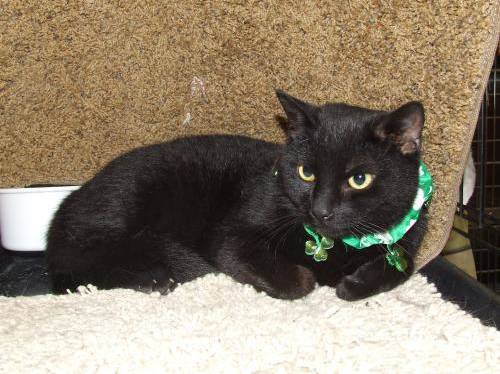

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


'cats'

In [46]:
directory = classes[np.random.randint(2)]
animal = directory[:-1]
img_path = 'dataset/test_set/' + directory + '/' + animal + '.' + str(np.random.randint(4001, 5001)) + '.jpg'
image.load_img(img_path).show()

test_image = image.load_img(img_path, target_size=(64,64))
classes[int(cnn.predict(
    np.expand_dims(
        image.img_to_array(test_image), 
        axis=0)
)[0][0])]